In [2]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Dell\\Desktop\\Deep_Learning\\Data\\homeprices_banglore.csv")

In [3]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
df.sample(5)

,area,bedrooms,price
16,1180,3,48.0
2,1440,3,62.0
6,2732,4,135.0
13,1100,2,40.0
12,1000,2,38.0


In [5]:
from sklearn import preprocessing

sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = sx.fit_transform(df.drop("price", axis= 1))

In [6]:
sx.transform(df.drop("price", axis = 1)).T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [7]:
scaled_X

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [8]:
scaled_X.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [9]:
df["price"].values

array([ 39.07, 120.  ,  62.  ,  75.  ,  51.  ,  38.  , 135.  , 155.  ,
        50.  , 167.  ,  82.  , 140.  ,  38.  ,  40.  , 101.  ,  42.  ,
        48.  ,  60.  , 102.  ,  32.  ])

In [10]:
df["price"].values.reshape(5,4)

array([[ 39.07, 120.  ,  62.  ,  75.  ],
       [ 51.  ,  38.  , 135.  , 155.  ],
       [ 50.  , 167.  ,  82.  , 140.  ],
       [ 38.  ,  40.  , 101.  ,  42.  ],
       [ 48.  ,  60.  , 102.  ,  32.  ]])

In [11]:
df["price"].values.reshape(df.shape[0], 1)

array([[ 39.07],
       [120.  ],
       [ 62.  ],
       [ 75.  ],
       [ 51.  ],
       [ 38.  ],
       [135.  ],
       [155.  ],
       [ 50.  ],
       [167.  ],
       [ 82.  ],
       [140.  ],
       [ 38.  ],
       [ 40.  ],
       [101.  ],
       [ 42.  ],
       [ 48.  ],
       [ 60.  ],
       [102.  ],
       [ 32.  ]])

In [12]:
scaled_y = sy.fit_transform(df["price"].values.reshape(df.shape[0], 1))
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [13]:
import numpy as np
np.ones(shape= 2)

array([1., 1.])

In [14]:
np.ones(20).shape

(20,)

In [15]:
def batch_gradient_descent(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X.shape[1]

    w = np.ones(number_of_features)
    bias = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        y_pred = np.dot(w, scaled_X.T) + bias

        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_pred))
        b_grad = -(2/total_samples)* np.sum(y_true-y_pred)

        w = w- learning_rate * w_grad
        bias = bias- learning_rate * b_grad

        cost = np.mean(np.square(y_true-y_pred))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, bias, cost_list, epoch_list

In [16]:
w, bias, cost_list, epoch_list = batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 500)
w, bias, cost_list, epoch_list

(array([0.70712464, 0.67456527]),
 -0.23034857438407422,
 [0.2768777174681,
  0.1657350702767106,
  0.10212908135956808,
  0.06564235879682483,
  0.04463022365578522,
  0.03245122421764872,
  0.02531733908301049,
  0.021067914076635823,
  0.018470418935235277,
  0.01682165753542818,
  0.01572033146918248,
  0.014937329116527912,
  0.014341749105819085,
  0.013858709977424097,
  0.013445288028074867,
  0.01307679395234498,
  0.012738945874049962,
  0.012423405193086516,
  0.012125230310262438,
  0.011841424159334757,
  0.011570105565415722,
  0.011310036391930275,
  0.011060351609573906,
  0.01082040510470265,
  0.010589681505198628,
  0.01036774566624043,
  0.010154213642862593,
  0.009948735925187004,
  0.009750987675343718,
  0.009560662965348802,
  0.009377471304274593,
  0.009201135478234788,
  0.009031390146006547,
  0.008867980872255632,
  0.008710663416728336,
  0.0085592031755736,
  0.008413374715338713,
  0.008272961365501461,
  0.008137754849850723,
  0.00800755494527638,
  0

In [17]:
#batch gradient descent

def batch_gd(X, y_true, epoch, lr = 0.01):
    n = X.shape[0]
    w = np.ones(X.shape[1])
    bias = 0
    lr = 0.01

    Losses = []
    Epochs = []

    for i in range(epoch):
        y_pred = np.dot(w, X.T) + bias

        dw = -(2/n)* (X.T.dot (y_true-y_pred))
        db = -(2/n) * np.sum(y_true-y_pred)

        w = w - lr * dw
        bias = bias - lr  * db

        loss = np.mean(np.square(y_true-y_pred))

        if i % 100 == 0:
            Losses.append(loss)
            Epochs.append(i)
    return w, bias, Losses, Epochs



In [18]:
scaled_X.T.shape

(2, 20)

In [19]:
scaled_y.shape

(20, 1)

In [20]:
w, bias, Losses, Epochs = batch_gd(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)

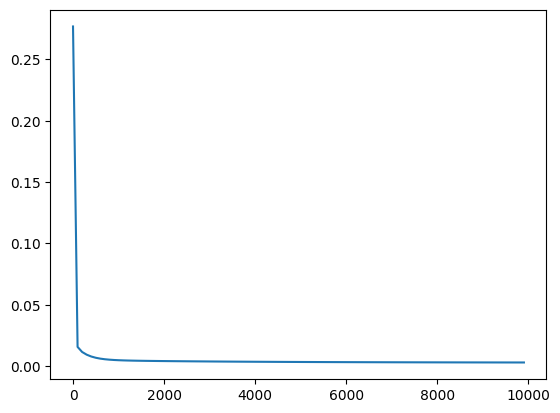

In [21]:
import matplotlib.pyplot as plt

plt.plot(Epochs, Losses)
plt.show()

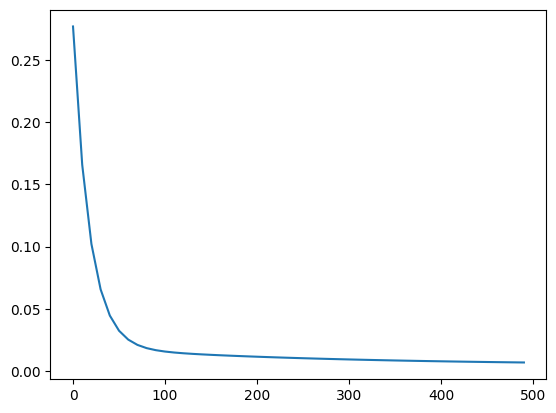

In [22]:
import matplotlib.pyplot as plt

plt.plot(epoch_list, cost_list)
plt.show()

In [23]:
for loss, cost in zip(Losses, cost_list):
    print(loss, cost)

0.2768777174681 0.2768777174681
0.01572033146918248 0.1657350702767106
0.011570105565415722 0.10212908135956808
0.009377471304274593 0.06564235879682483
0.007882169161242125 0.04463022365578522
0.006855698712269262 0.03245122421764872
0.0061461047160700525 0.02531733908301049
0.0056508333434331145 0.021067914076635823
0.005300661894785443 0.018470418935235277
0.005048861809049931 0.01682165753542818
0.0048638852492793065 0.01572033146918248
0.004724429573959582 0.014937329116527912
0.004616106544390359 0.014341749105819085
0.004529194501818235 0.013858709977424097
0.004457121395978504 0.013445288028074867
0.004395441035048293 0.01307679395234498
0.004341142190426568 0.012738945874049962
0.004292182331612248 0.012423405193086516
0.004247172954816191 0.012125230310262438
0.004205167216103302 0.011841424159334757
0.004165516605829237 0.011570105565415722
0.004127774216394687 0.011310036391930275
0.0040916294541069155 0.011060351609573906
0.004056863971571985 0.01082040510470265
0.00402332

In [24]:
scaled_X[:5]

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ]])

In [25]:
sy.inverse_transform([[1]])

array([[167.]])

In [26]:
def predict(x1, x2 , w, bias):
    scaled_X = sx.transform([[x1, x2]])[0]

    scaled_price = w[0] * scaled_X[0] + w[1] * scaled_X[1] + bias

    return sy.inverse_transform([[scaled_price]])[0][0]



In [27]:
predict(1056, 2, w, bias)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


39.55470564543538

In [28]:
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [29]:
predict(2600,4, w, bias)

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


120.69441413246746

## Stochastic Gradient Descent

In [30]:
import random
random.randint(0,10)

4

In [31]:
def stochastic_gd(X, y_true, epochs, learning_rate = 0.01):
    number_of_features = X. shape[1]

    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for i in range(epochs):
        random_index = random.randint(0, total_samples-1)
        sample_x = X[random_index]
        sample_y = y_true[random_index]

        y_pred = np.dot(w, sample_x.T) + b

        w_grad = -(2/total_samples)*(sample_x.T.dot(sample_y-y_pred))
        b_grad = -(2/total_samples)*(sample_y-y_pred)

        w = w - learning_rate * w_grad
        b = b - learning_rate * b_grad

        cost = np.square(sample_y-y_pred)

        if i % 100 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
    return w, b, cost, cost_list , epoch_list

In [32]:
 w, b, cost, cost_list , epoch_list = stochastic_gd(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10000)

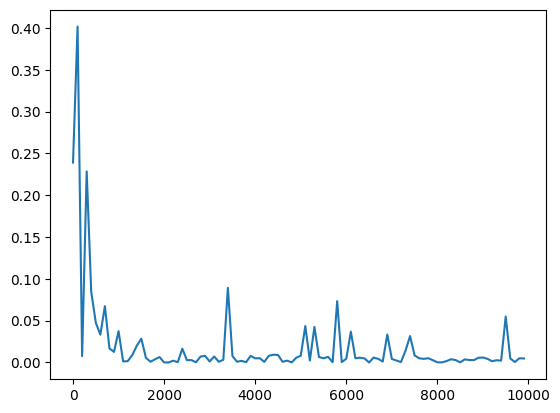

In [33]:
plt.plot(epoch_list, cost_list)
plt.show()

In [34]:
predict(2600,4,w, b) 

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.56397887999768

In [35]:
for i in range(0,100, 10):
    print(i)

0
10
20
30
40
50
60
70
80
90


## Minibatch gradient descent 

Epoch 0: Cost 0.961223152533156
Epoch 10: Cost 0.8037836436040513
Epoch 20: Cost 0.726191586699598
Epoch 30: Cost 0.6949912706873416
Epoch 40: Cost 0.6835417102254456
Epoch 50: Cost 0.6793403281931861
Epoch 60: Cost 0.6778172400658697
Epoch 70: Cost 0.6772429098928674
Epoch 80: Cost 0.6770214418803414
Epoch 90: Cost 0.6769350597369013
Epoch 99: Cost 0.676904068101476


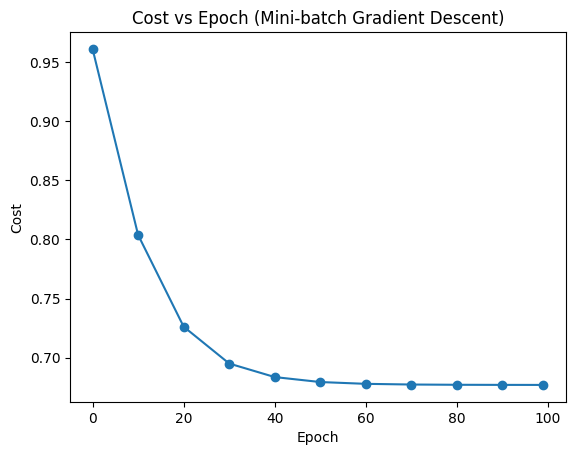

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log loss function
def log_loss(y_true, y_pred):
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Mini-batch gradient descent implementation
def minibatch_gd(X, y_true, batch_size, epochs, learning_rate=0.01):
    number_of_features = X.shape[1]

    w = np.ones(number_of_features)
    b = 0
    total_samples = X.shape[0]

    cost_list = []
    epoch_list = []

    for epoch in range(epochs):
        # Shuffle the data at the beginning of each epoch
        indices = np.random.permutation(total_samples)
        X_shuffled = X[indices]
        y_shuffled = y_true[indices]

        for start_idx in range(0, total_samples, batch_size):
            end_idx = min(start_idx + batch_size, total_samples)
            sample_x = X_shuffled[start_idx:end_idx]
            sample_y = y_shuffled[start_idx:end_idx]

            y_pred = sigmoid(np.dot(sample_x, w) + b)

            w_grad = -(2 / batch_size) * np.dot(sample_x.T, (sample_y - y_pred))
            b_grad = -(2 / batch_size) * np.sum(sample_y - y_pred)

            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad

        # Compute the cost for the whole dataset at the end of each epoch
        y_pred_full = sigmoid(np.dot(X, w) + b)
        cost = log_loss(y_true, y_pred_full)

        if epoch % 10 == 0 or epoch == epochs - 1:
            cost_list.append(cost)
            epoch_list.append(epoch)
            print(f"Epoch {epoch}: Cost {cost}")

    return w, b, cost_list, epoch_list

# Example usage:
# Generating synthetic data for demonstration
np.random.seed(0)
X = np.random.randn(100, 2)
y_true = (np.random.rand(100) > 0.5).astype(int)

# Hyperparameters
batch_size = 10
epochs = 100
learning_rate = 0.01

# Run mini-batch gradient descent
w, b, cost_list, epoch_list = minibatch_gd(X, y_true, batch_size, epochs, learning_rate)

# Plotting cost vs epoch graph
plt.plot(epoch_list, cost_list, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch (Mini-batch Gradient Descent)')
plt.show()


In [37]:
 w, b, cost, cost_list , epoch_list = stochastic_gd(scaled_X, scaled_y.reshape(scaled_y.shape[0],),10, 10000)

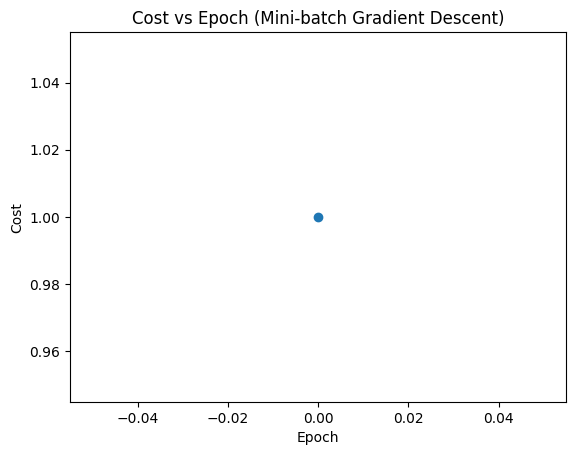

In [38]:
# Plotting cost vs epoch graph
plt.plot(epoch_list, cost_list, marker='o')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch (Mini-batch Gradient Descent)')
plt.show()


In [39]:
def minibatch_grad_desc(X, y_true, bs , epoch, lr = 0.01):
    w = np.ones(X.shape[1])
    n = X.shape[0]
    lr = 0.01
    b = 0

    Epochs = []
    Loss = []

    for i in range(epoch):
        
        idx = []
        for j in range(bs):
            idx.append(random.randint(0,n-1))

        Xs = X[idx]
        ys = y_true[idx] 
        y_pred = np.dot(w, Xs.T) + b

        dw = -(2/n) * np.dot(Xs.T, (ys-y_pred))
        db = -(2/n) * (ys-y_pred)

        w = w - lr * dw
        b = b - lr * db

        loss = np.square(ys- y_pred)
        loss = np.mean(loss)

        if i % 100 == 0 :
            Loss.append(loss)
            Epochs.append(i)
    return w , b, Loss, Epochs
        

In [40]:
w , b, Loss, Epochs = minibatch_grad_desc(scaled_X, scaled_y.reshape(scaled_y.shape[0],), 10, 10000)

In [41]:
len(Loss)
len(Epochs)

100

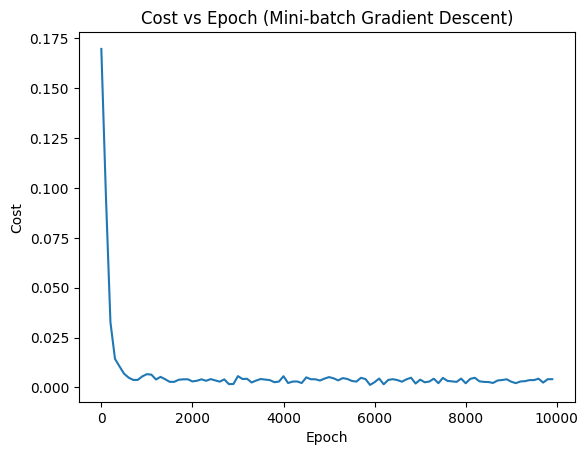

In [42]:
# Plotting cost vs epoch graph
plt.plot(Epochs, Loss)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Cost vs Epoch (Mini-batch Gradient Descent)')
plt.show()


In [43]:
np.random.permutation(10)

array([0, 4, 6, 7, 5, 3, 2, 9, 1, 8])

In [44]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b

            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    scaled_X,
    scaled_y.reshape(scaled_y.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

(array([0.71012854, 0.67812765]), -0.23344884357984919, 0.01341973043756326)

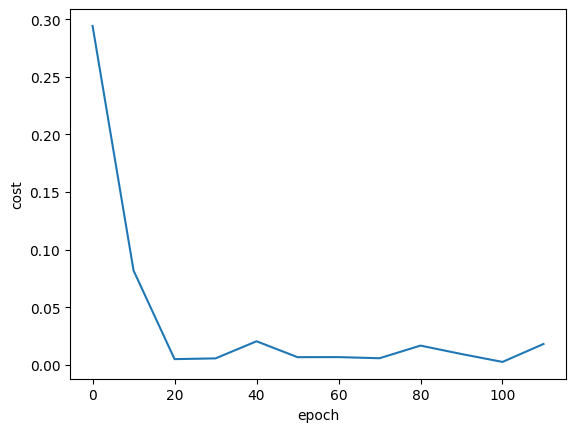

In [45]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)